In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [37]:
def file(list):
    idx = np.array([])
    time = np.array([])
    data = np.genfromtxt(list)
    for i in range(len(data)):
        idx = np.append(idx, data[i,0])
        time = np.append(time, data[i,1])
    time = time - time[0]
    idx = idx - 1 #indexing from 0
    return idx, time

    
E_idx, E_time = file('elias.dat')
R_idx, R_time = file('rasmus.dat')
J_idx, J_time = file('jacob.dat')

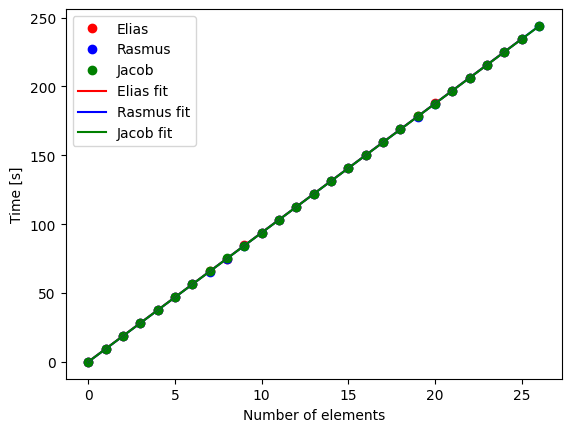

In [38]:
#Curve fitting
def line(x, a, b):
    return a * x + b

def curvefit(idx, time):
    idx = np.array(idx)  # Convert idx to numpy array
    popt, pcov = curve_fit(line, idx, time)
    return popt

E_popt = curvefit(E_idx, E_time)
R_popt = curvefit(R_idx, R_time)
J_popt = curvefit(J_idx, J_time)

#Plotting
plt.plot(E_idx, E_time, 'ro', label='Elias')
plt.plot(R_idx, R_time, 'bo', label='Rasmus')
plt.plot(J_idx, J_time, 'go', label='Jacob')
plt.plot(E_idx, line(np.array(E_idx), *E_popt), 'r', label = "Elias fit") 
plt.plot(R_idx, line(np.array(R_idx), *R_popt), 'b', label = "Rasmus fit")
plt.plot(J_idx, line(np.array(J_idx), *J_popt), 'g', label = "Jacob fit")
plt.xlabel('Number of elements')
plt.ylabel('Time [s]')
plt.legend()



[3.9524258  0.01026541 0.01739918]
0.040932058380777604 0.017399177847793098


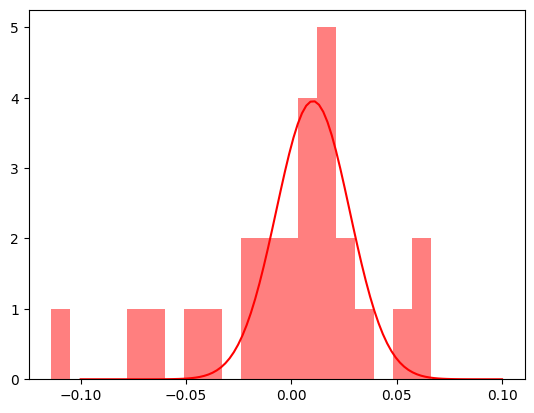

In [60]:

from scipy.stats import norm


def gauss(x, a, b,sigma):
    return a * np.exp(-(x-b)**2 / (2*sigma**2))

#Calculating the residual
def residual(idx, time, popt):
    return time - line(idx, *popt)

E_res = residual(E_idx, E_time, E_popt)
R_res = residual(R_idx, R_time, R_popt)
J_res = residual(J_idx, J_time, J_popt)

#curvefitting
def curvefit_residual(counts, edges):
    popt, pcov = curve_fit(gauss, edges, counts)
    return popt

xx = np.linspace(-0.1, 0.1, 100)

counts, edges = np.histogram(E_res, bins=20)
center = (edges[:-1] + edges[1:]) / 2
pop = curvefit_residual(counts, center)
print(pop)

plt.hist(E_res,bins = 20,  color='r', alpha=0.5, label='Elias')
plt.plot(xx, gauss(xx, *curvefit_residual(counts, center)), 'r')
print(np.std(E_res), curvefit_residual(counts, center)[2])